In [9]:
# Script to scrape arXiv to compute number of astro papers published each day
# URL form is
# https://arxiv.org/search/advanced?advanced=1&date-from_date=2019-03-16&date-to_date=2019-03-17&terms-0-operator=AND&terms-0-field=title&classification-physics=y&classification-physics_archives=astro-ph&classification-include_cross_list=include&date-year=&date-filter_by=date_range
#
# Written by BMG 19 Mar 2020

In [10]:
import requests
import urllib
from bs4 import BeautifulSoup
from datetime import timedelta, date, datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates


def daterange(start_date, end_date):
    for n in range(0,int ((end_date - start_date).days),7):
        yield start_date + timedelta(n)

In [11]:
# Using info from https://web.archive.org/web/20200319144443/https://hackersandslackers.com/scraping-urls-with-beautifulsoup/

# Set headers to not trigger robot alert
headers = requests.utils.default_headers()
headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

In [12]:
# Loop through years

num2020 = np.array([])
date2020 = np.array([])
num2019 = np.array([])
date2019 = np.array([])

start_date = date(2019,1,15)
end_date = date.today()
for single_date in daterange(start_date, end_date):
    date1 = single_date.strftime("%Y-%m-%d")
    date2 = (single_date - timedelta(days=7)).strftime("%Y-%m-%d")
    date3 = (single_date - timedelta(days=52*7)).strftime("%Y-%m-%d")
    date4 = (single_date - timedelta(days=52*7+7)).strftime("%Y-%m-%d")
# Astronomy
    url1 = "https://arxiv.org/search/advanced?advanced=1&date-from_date="+date2+"&"+"date-to_date="+date1+"&terms-0-operator=AND&terms-0-field=title&classification-physics=y&classification-physics_archives=astro-ph&classification-include_cross_list=include&date-year=&date-filter_by=date_range"
    url2 = "https://arxiv.org/search/advanced?advanced=1&date-from_date="+date4+"&"+"date-to_date="+date3+"&terms-0-operator=AND&terms-0-field=title&classification-physics=y&classification-physics_archives=astro-ph&classification-include_cross_list=include&date-year=&date-filter_by=date_range"
# Physics    
#    url1 = "https://arxiv.org/search/advanced?advanced=1&date-from_date="+date2+"&"+"date-to_date="+date1+"&terms-0-operator=AND&terms-0-field=title&classification-physics=y&classification-include_cross_list=include&date-year=&date-filter_by=date_range"
#    url2 = "https://arxiv.org/search/advanced?advanced=1&date-from_date="+date4+"&"+"date-to_date="+date3+"&terms-0-operator=AND&terms-0-field=title&classification-physics=y&classification-include_cross_list=include&date-year=&date-filter_by=date_range"
    req1 = requests.get(url1, headers)
    req2 = requests.get(url2, headers)
    soup1 = BeautifulSoup(req1.content, 'html.parser')
    soup2 = BeautifulSoup(req2.content, 'html.parser')

# Find entry 3 words after the word 'showing'
    splitsoup1 = soup1.prettify().split()
    num1 = splitsoup1[splitsoup1.index("Showing")+3]
    splitsoup2 = soup2.prettify().split()
    num2 = splitsoup2[splitsoup2.index("Showing")+3]

    date2020 = np.append(date2020,date2)
    num2020 = np.append(num2020,num1)
    date2019 = np.append(date2019,date4)
    num2019 = np.append(num2019,num2)


In [13]:
# Strip comma for numbers >= 1000
num2019 = np.char.replace(num2019, ',', '')
num2020 = np.char.replace(num2020, ',', '')

In [14]:
num2019 = num2019.astype(np.int)
num2020 = num2020.astype(np.int)
numratio = num2020/num2019

In [15]:
day2020 = [datetime.strptime(x, '%Y-%m-%d') for x in date2020]
day2019 = [datetime.strptime(x, '%Y-%m-%d') for x in date2019]


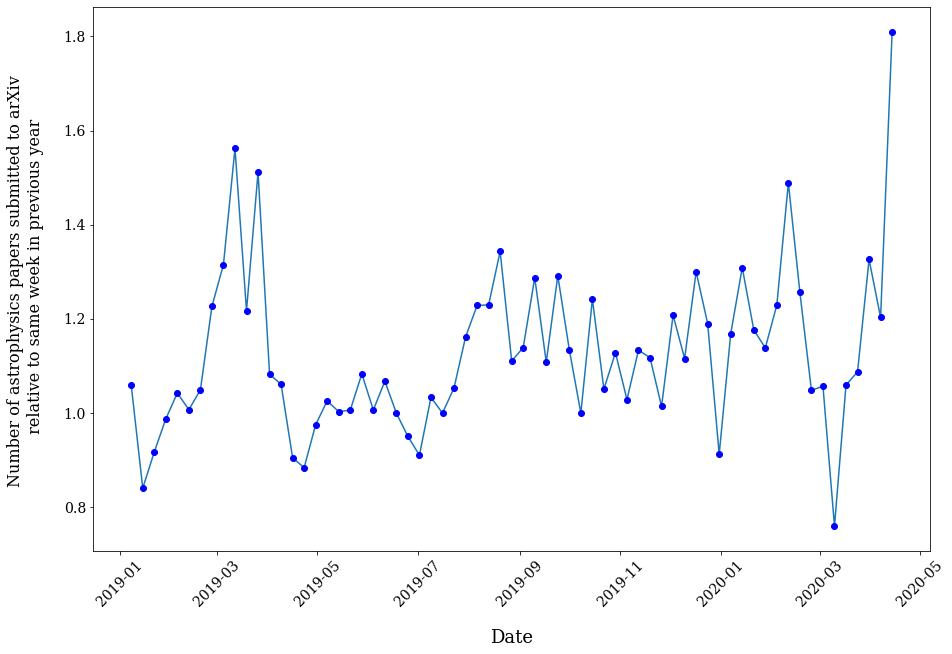

In [17]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.figure(figsize=(15,10)) 
plt.xticks(rotation=45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.plot(day2020,numratio)
plt.plot(day2020,numratio,'bo')
plt.xlabel('Date', fontsize=18,labelpad=20)
plt.ylabel('Number of astrophysics papers submitted to arXiv \n relative to same week in previous year', fontsize=16, labelpad=20)
#plt.plot(day2020,num2019,label='2019')
#plt.plot(day2020,num2020,label='2020')
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2, mode="expand", borderaxespad=0.)
plt.show()